In [156]:
# libraries 

import numpy as np
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# pd options
pd.set_option('display.max_columns', 50)

# path
path = "data/"
plan_adoption_nta_data_path = "Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv"
choice_speed_census_block_path = "Internet_Master_Plan__Broadband_Choice_and_Speed_by_Census_Block.csv"
nta_path = "NTAs/geo_export_39f36236-a0bb-42e7-ab68-f77a2f727c13.shp"
nyc_census_blocks_path = "data/2010_Census_Blocks/geo_export_7829e0ad-0816-4dbe-b8a1-d10343209019.shp"


In [157]:
# reading in csv
adoption_nta_csv = pd.read_csv(path+plan_adoption_nta_data_path)
choice_speed_census_block_csv = pd.read_csv(path + choice_speed_census_block_path)
#adoption_nta_csv.head()

In [158]:
choice_speed_census_block_csv.head()

,OID,BlockCode,GEO_ID,BlockCode2,GEO_ID2,BCTCB2010,BoroCode,NTA Code,NTA Name,Borough,PUMA,Maximum Residential Broadband Speed by Block,Residential ISP Count by Block,Commerical Fiber Count by Block
0,1,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165001000,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
1,2,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165001001,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,3
2,3,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002000,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
3,4,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002001,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
4,5,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002002,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1


In [159]:
nyc_census_blocks.tail()

,bctcb2010,boro_code,boro_name,cb2010,ct2010,shape_area,shape_leng,geometry
38794,30449004019,3,Brooklyn,4019,044900,116818.266632,1425.528777,"POLYGON ((-73.93087 40.72422, -73.93244 40.723..."
38795,30449004011,3,Brooklyn,4011,044900,122510.779450,1442.192742,"POLYGON ((-73.93313 40.72537, -73.93306 40.725..."
38796,30449004021,3,Brooklyn,4021,044900,63797.924677,1210.033856,"POLYGON ((-73.93287 40.72479, -73.93446 40.724..."
38797,50081003006,5,Staten Island,3006,008100,95350.104559,1255.098527,"POLYGON ((-74.08879 40.64424, -74.08963 40.644..."
38798,50081003007,5,Staten Island,3007,008100,277598.917738,2228.094987,"POLYGON ((-74.08963 40.64402, -74.08970 40.644..."


In [160]:
# get columns 
adoption_nta_cols = adoption_nta_csv.columns

print(adoption_nta_cols)

# obviously we only want some of them
target_var = ['Neighborhood Tabulation Area Code (NTA Code)', 'Neighborhood Tabulation Area Name (NTA NAME)', 
              'Borough Name', 'Total Population', 'Population Density (per Sq. Mi.)', 'Total Number of Households', 
              'Area (Sq. Mi.)', 'Street Mileage', 'Home Broadband Adoption (Percentage of Households)', 
              'Residential Broadband Choice Average by NTA','Commercial Fiber ISP Choice Average by NTA', 
              'Commercial Fiber Max ISP Choice by NTA', 'Percentage of Blocks without a Commercial Fiber Provider',
              'Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed)',
              'Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps', 'Estimated Number of Businesses', 
              'Mobile Dependent Households (Percentage of Households)', 'Number of Households', 'Total Accounts', 'Account Density', 'Population Projections 2050', 
              'Households Receiving Benefits', 'Low-Income Housing (NYCHA)', 'Number of NYCHA Buildings', 
              'NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient',
              'Reviewed for Underground Fiber-to-the-Premise? (Y/N)', 'Reviewed for Aerial Fiber-to-the-Premise? (Y/N)',
              'Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N)', 'Field Survey Findings']

# only select those columns 
adoption_nta_csv_narrow = adoption_nta_csv.loc[:,target_var]

Index(['Neighborhood Tabulation Area Code (NTA Code)',
       'Neighborhood Tabulation Area Name (NTA NAME)', 'Borough Name',
       'Total Population', 'Population Density (per Sq. Mi.)',
       'Total Number of Households', 'Area (Sq. Mi.)', 'Street Mileage',
       'Home Broadband Adoption (Percentage of Households)',
       'Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Broadband Adoption (Percentage of Households)',
       'Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Dependent Households (Percentage of Households)',
       'Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Residential Broadband Choice Average by NTA',
       'Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Commercial Fiber ISP Choice Average by NTA',
       'Commercial Fiber Choice Average by Quartiles (High, Medium-High, Me

Text(0.5, 0, 'Commercial Fiber ISP Choice Average by NTA')

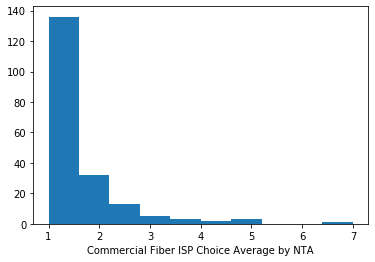

In [161]:
plt.hist(adoption_nta_csv_narrow.loc[:, "Commercial Fiber ISP Choice Average by NTA"])
plt.xlabel('Commercial Fiber ISP Choice Average by NTA')

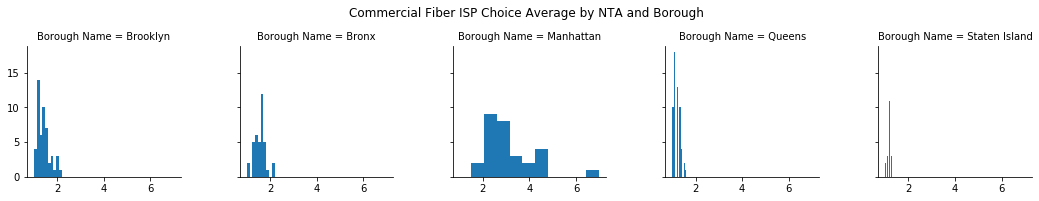

In [162]:
g = sns.FacetGrid(adoption_nta_csv_narrow, col = "Borough Name", margin_titles = True)
g.map(plt.hist, "Commercial Fiber ISP Choice Average by NTA")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Commercial Fiber ISP Choice Average by NTA and Borough", fontsize=12)
g.set(xlabel="")

Evidently most NTAs only have one or two commercial fiber internet service providers with the exception of Manhattan which is skewing the summary statistic for the entire city.

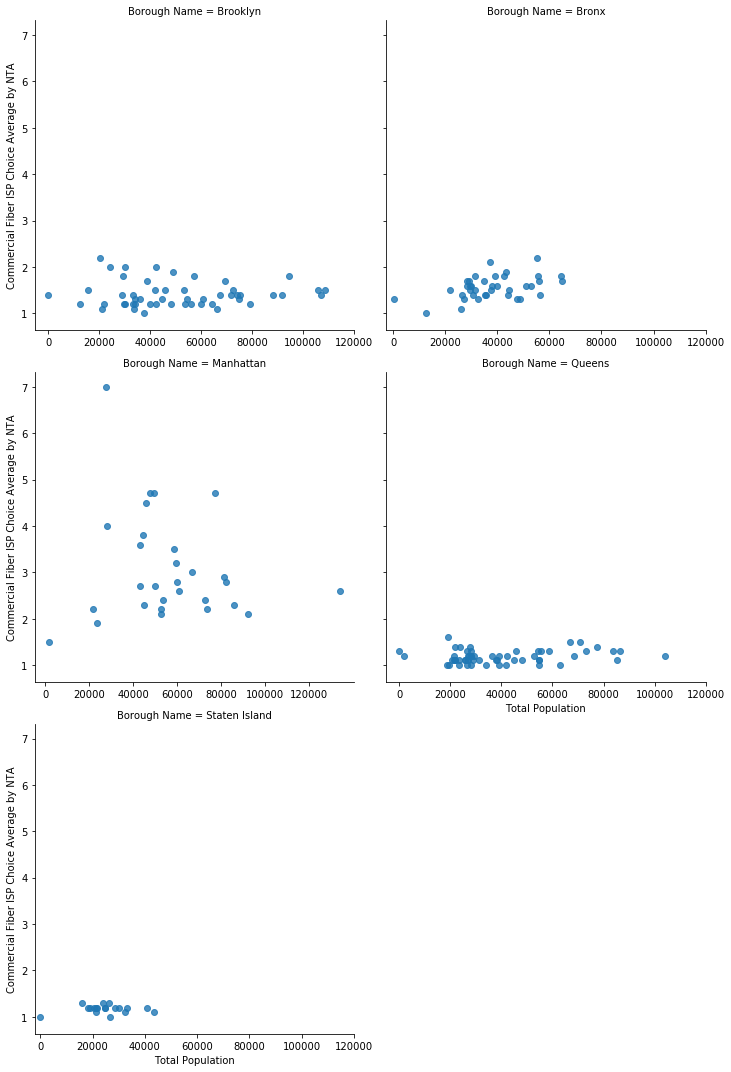

In [163]:
g = sns.lmplot("Total Population", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 140000, 20000))
plt.show(g)

But what we see is that the average number of fiber ISP does not quite vary with population size. If we were to plot it against the population density, we will see the exact same relationship. That is, there is none to speak of. 

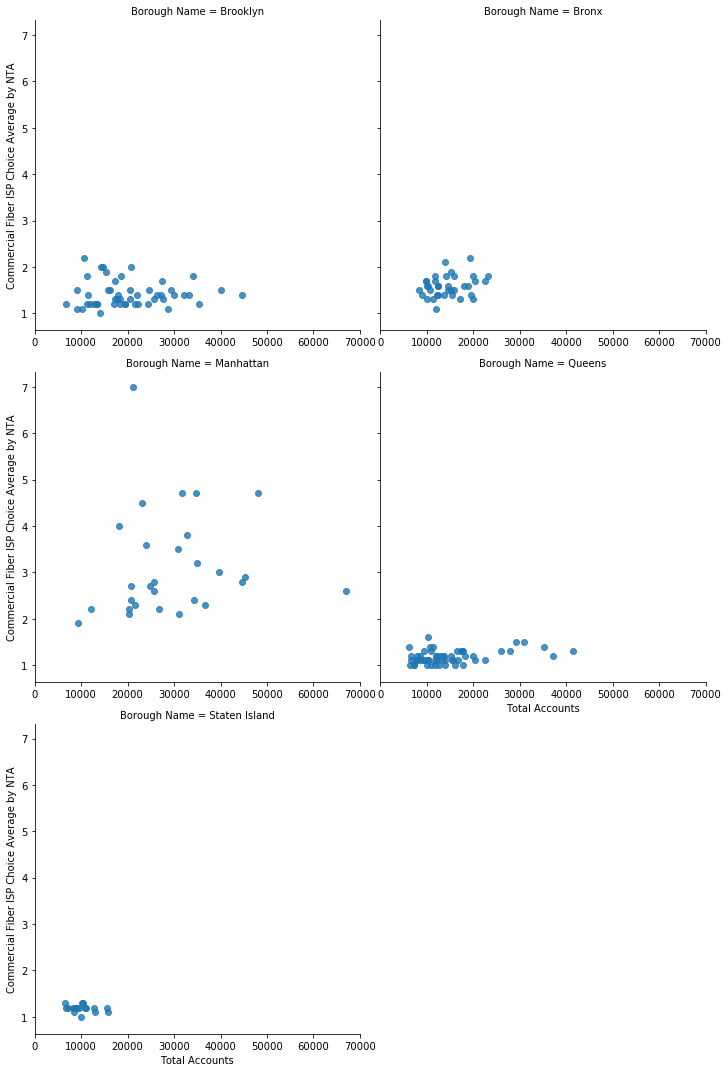

In [164]:
g = sns.lmplot("Total Accounts", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 80000, 10000))
plt.show(g)

Here, we see something more interesing. In Manhattan where there are more accounts, it appears that there is a positive correlation between the number of accounts in each NTA and the number of providers. However, this relationship does not hold true in Queens where there are neighborhoods with high number of accounts.  
However, the real reason why we are seeing this is probably because the dataset asks for availability of Fiber Optic Technology to **commercial/governmental entities** as opposed to **residential**. Thus, it will make sense for it to be more prevalent in Manhattan than any of the other boroughs which are dominated by residential customers. 

In [165]:
# reading in NTA shapefile
# merging with dataset
nyc_nta = gpd.read_file(path + nta_path)
nyc_nta_internet = nyc_nta.merge(adoption_nta_csv_narrow, left_on = "ntacode", right_on = "Neighborhood Tabulation Area Code (NTA Code)")

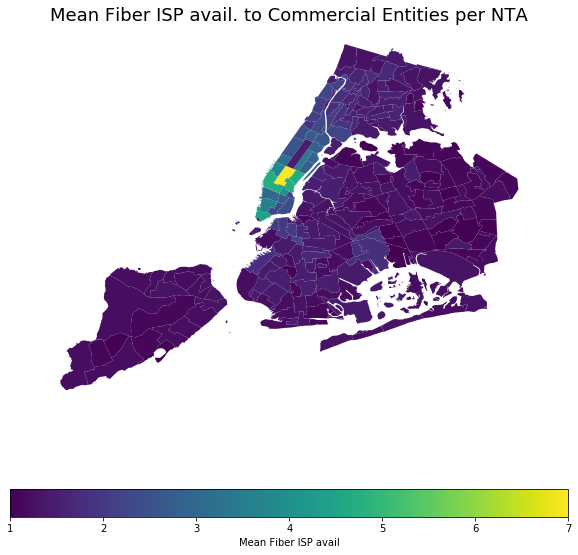

In [166]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Mean Fiber ISP avail. to Commercial Entities per NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = "Commercial Fiber ISP Choice Average by NTA", 
                      legend = True,
                     legend_kwds = {
                         'label': 'Mean Fiber ISP avail',
                         'orientation': 'horizontal'
                     })

Okay. So what if we just look at broadband access? Broadband access is defined as "an internet service with a download speed of at least 25 megabits per second (Mbps) and an upload speed of at least 3 Mbps" (FCC).  

On average, the proportion of households in each NTA with a broadband connection is: 0.687
The median proportion of households in each NTA with a broadband connection is: 0.71


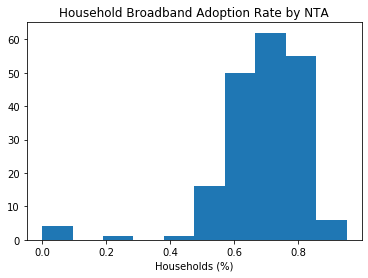

In [167]:
plt.hist(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"])
plt.xlabel('Households (%)')
plt.title("Household Broadband Adoption Rate by NTA")
print("On average, the proportion of households in each NTA with a broadband connection is: " + 
    str(round(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"].mean(),3)) + 
    "\nThe median proportion of households in each NTA with a broadband connection is: " + 
    str(round(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"].median(),3)))

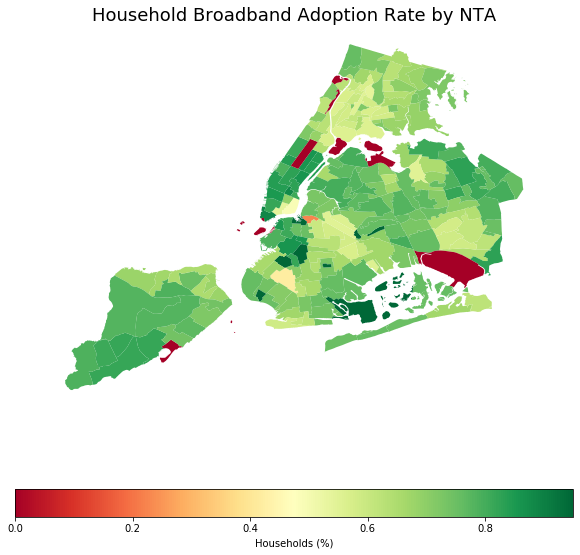

In [168]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Household Broadband Adoption Rate by NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = 'Home Broadband Adoption (Percentage of Households)', 
                      legend = True,
                     legend_kwds = {
                         'label': 'Households (%)',
                         'orientation': 'horizontal'
                     },
                     cmap = "RdYlGn")

Unsurprisingly, we see that household adoption rate tends to dip in NTAs that are commonly acknowledged as less-privileged parts of New York City, namely the Bronx, Queens, and southern Brooklyn. It is worth noting that areas with exceptionally low rates of adoption correspond to Central Park, JFK International Airport, and Rykers Island.  
  
Does it necessarily follow that households who do not subscribe to wired broadband plans rely on mobile broadband plans then? In other words, are the two products in competitive supply? Are they substitutes for one another? 

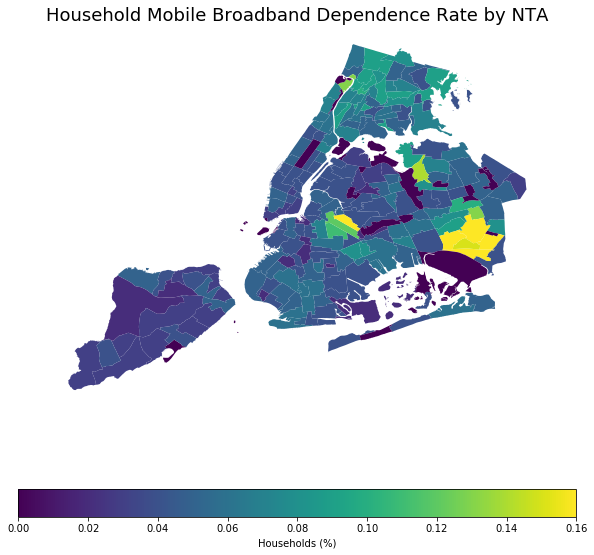

In [169]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Household Mobile Broadband Dependence Rate by NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = 'Mobile Dependent Households (Percentage of Households)', 
                      legend = True,
                     legend_kwds = {
                         'label': 'Households (%)',
                         'orientation': 'horizontal'
                     })

In [170]:
# household mobile broadband dependence
hh_mb_dependence_target_var = ['Neighborhood Tabulation Area Code (NTA Code)', 'Neighborhood Tabulation Area Name (NTA NAME)', 
              'Borough Name', 'Home Broadband Adoption (Percentage of Households)','Mobile Dependent Households (Percentage of Households)', 'Number of Households']
hh_mb_dependence_nta = adoption_nta_csv.loc[:,hh_mb_dependence_target_var]
hh_mb_dependence_nta = hh_mb_dependence_nta.sort_values(by = ["Mobile Dependent Households (Percentage of Households)"], ascending = False).reset_index(drop = True)

In [171]:
hh_mb_dependence_nta.head(n = 20)

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Home Broadband Adoption (Percentage of Households),Mobile Dependent Households (Percentage of Households),Number of Households
0,QN76,Baisley Park,Queens,0.59,0.16,11142.0
1,BK77,Bushwick North,Brooklyn,0.56,0.16,19367.0
2,QN08,St. Albans,Queens,0.61,0.16,15623.0
3,QN66,Laurelton,Queens,0.62,0.16,8085.0
4,QN03,Springfield Gardens South-Brookville,Queens,0.64,0.16,5918.0
5,QN02,Springfield Gardens North,Queens,0.59,0.15,10407.0
6,QN22,Flushing,Queens,0.55,0.14,26279.0
7,MN01,Marble Hill-Inwood,Manhattan,0.63,0.13,19616.0
8,QN07,Hollis,Queens,0.64,0.13,6167.0
9,BK78,Bushwick South,Brooklyn,0.55,0.12,26616.0


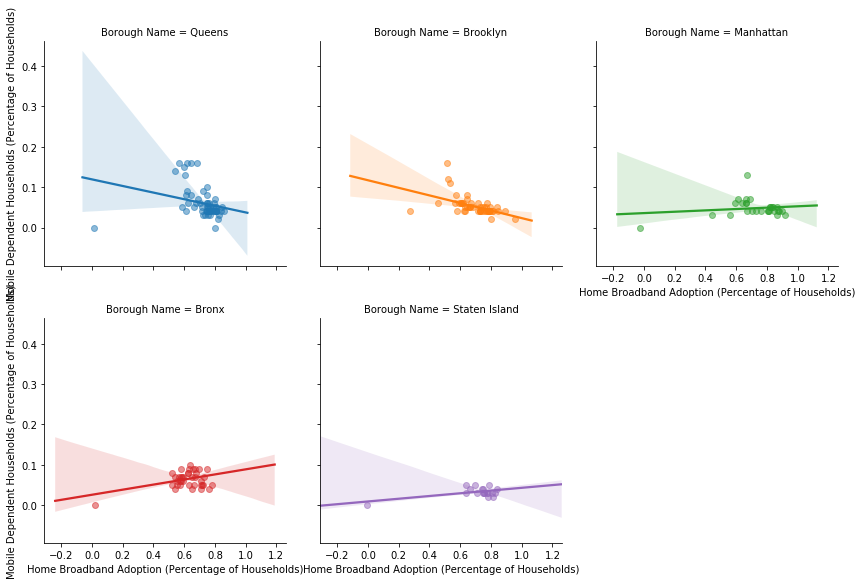

In [172]:
sns.lmplot(x = "Home Broadband Adoption (Percentage of Households)", 
            y = "Mobile Dependent Households (Percentage of Households)",
            hue = "Borough Name",
            x_jitter = 0.05,
           col = "Borough Name",
           col_wrap = 3, 
           height = 4,
            data = hh_mb_dependence_nta,
            scatter_kws = {"alpha": 0.5})

Interesting. It appears that mobile broadband is not exactly a substitute for wired broadband. Might I even say that broadband access at home does not appear to be a necessity at home? If it is a necessity, we might see people pick one or another, which means that households' mobile broadband dependence and wired home broadband subscription are negatively correlated at the NTA level. These two groups are mutually exclusive. To make this more explicit, perhaps we need to consider the proportion of households in each NTA that neither have mobile broadband nor wired broadband.

Text(0.5, 1.0, 'Households with no form of Broadband (%) by NTA')

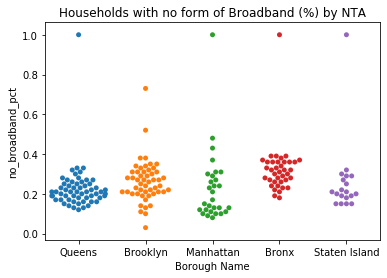

In [173]:
# creating a new variable
hh_mb_dependence_nta = hh_mb_dependence_nta.assign(
    no_broadband_pct = 1-hh_mb_dependence_nta["Home Broadband Adoption (Percentage of Households)"]-hh_mb_dependence_nta["Mobile Dependent Households (Percentage of Households)"],
    no_broadband_num = round((1-hh_mb_dependence_nta["Home Broadband Adoption (Percentage of Households)"]-hh_mb_dependence_nta["Mobile Dependent Households (Percentage of Households)"])*(hh_mb_dependence_nta['Number of Households'])))
# plotting
sns.swarmplot(x = "Borough Name", y = "no_broadband_pct", data = hh_mb_dependence_nta).set_title("Households with no form of Broadband (%) by NTA")

c:\users\wesch\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
c:\users\wesch\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0.5, 1.0, 'No. of Households with no form of Broadband by NTA')

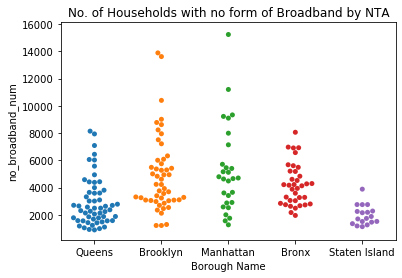

In [174]:
sns.swarmplot(x = "Borough Name", y = "no_broadband_num", data = hh_mb_dependence_nta).set_title("No. of Households with no form of Broadband by NTA")

Each dot represents an NTA. Manhattan has a long tail but most of the underserved NTAs are in Brooklyn and Queens.  
  
#### Broadband Speed  
So what about broadband speed at the Census Block level?

In [175]:
# reading in census block shapefile
nyc_census_blocks = gpd.read_file(nyc_census_blocks_path)

# converting type to be compatible
nyc_census_blocks.bctcb2010=nyc_census_blocks.bctcb2010.astype(np.int64)

# merging shp with csv
nyc_census_blocks_internet = nyc_census_blocks.merge(choice_speed_census_block_csv, right_on = "BCTCB2010", left_on = "bctcb2010")


In [176]:
nyc_census_blocks_internet.head()

,bctcb2010,boro_code,boro_name,cb2010,ct2010,shape_area,shape_leng,geometry,OID,BlockCode,GEO_ID,BlockCode2,GEO_ID2,BCTCB2010,BoroCode,NTA Code,NTA Name,Borough,PUMA,Maximum Residential Broadband Speed by Block,Residential ISP Count by Block,Commerical Fiber Count by Block
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",28259,3.608500e+14,3.608500e+11,3.608500e+14,3.608500e+11,50009001000,5,SI22,West New Brighton-New Brighton-St. George,Staten Island,3903,940,2,2
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((-74.07062 40.61086, -74.07164 40.610...",28307,3.608500e+14,3.608500e+11,3.608500e+14,3.608500e+11,50020011000,5,SI37,Stapleton-Rosebank,Staten Island,3903,940,2,1
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((-74.07524 40.62601, -74.07750 40.625...",20603,3.608500e+14,3.608500e+11,3.608500e+14,3.608500e+11,50027001000,5,SI37,Stapleton-Rosebank,Staten Island,3903,940,2,1
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.08709 40.61117, -74.08795 40.610...",10575,3.608500e+14,3.608500e+11,3.608500e+14,3.608500e+11,50040001000,5,SI08,Grymes Hill-Clifton-Fox Hills,Staten Island,3903,940,2,1
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((-74.07644 40.60100, -74.07670 40.600...",10654,3.608500e+14,3.608500e+11,3.608500e+14,3.608500e+11,50064001000,5,SI14,Grasmere-Arrochar-Ft. Wadsworth,Staten Island,3902,940,2,2


In [177]:
nyc_census_blocks.bctcb2010=nyc_census_blocks.bctcb2010.astype(np.int64)
choice_speed_census_block_csv["Maximum Residential Broadband Speed by Block"]=choice_speed_census_block_csv["Maximum Residential Broadband Speed by Block"].astype(int)
nyc_census_blocks.dtypes

bctcb2010        int64
boro_code       object
boro_name       object
cb2010          object
ct2010          object
shape_area     float64
shape_leng     float64
geometry      geometry
dtype: object

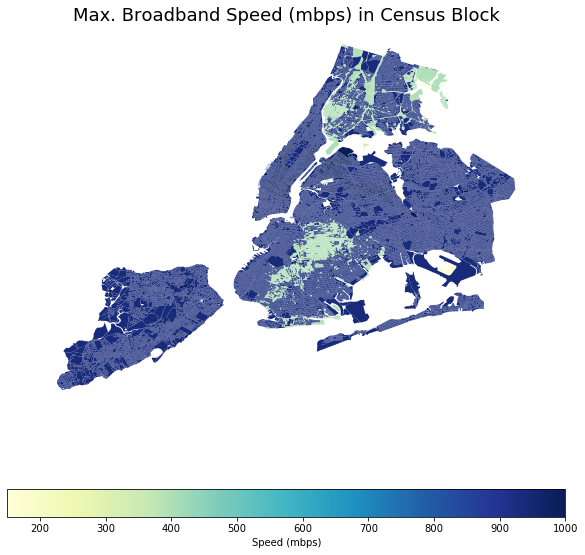

In [179]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Max. Broadband Speed (mbps) in Census Block', fontsize=18)
ax.axis("off")
nyc_census_blocks_internet.plot(ax = ax, 
                                column = 'Maximum Residential Broadband Speed by Block',
                                legend = True,
                                legend_kwds = {
                                   'label': 'Speed (mbps)',
                                   'orientation': 'horizontal'},
                               cmap = "YlGnBu")

In [111]:
choice_speed_census_block_csv.dtypes

OID                                               int64
BlockCode                                       float64
GEO_ID                                          float64
BlockCode2                                      float64
GEO_ID2                                         float64
BCTCB2010                                         int64
BoroCode                                          int64
NTA Code                                         object
NTA Name                                         object
Borough                                          object
PUMA                                             object
Maximum Residential Broadband Speed by Block     object
Residential ISP Count by Block                    int64
Commerical Fiber Count by Block                   int64
dtype: object

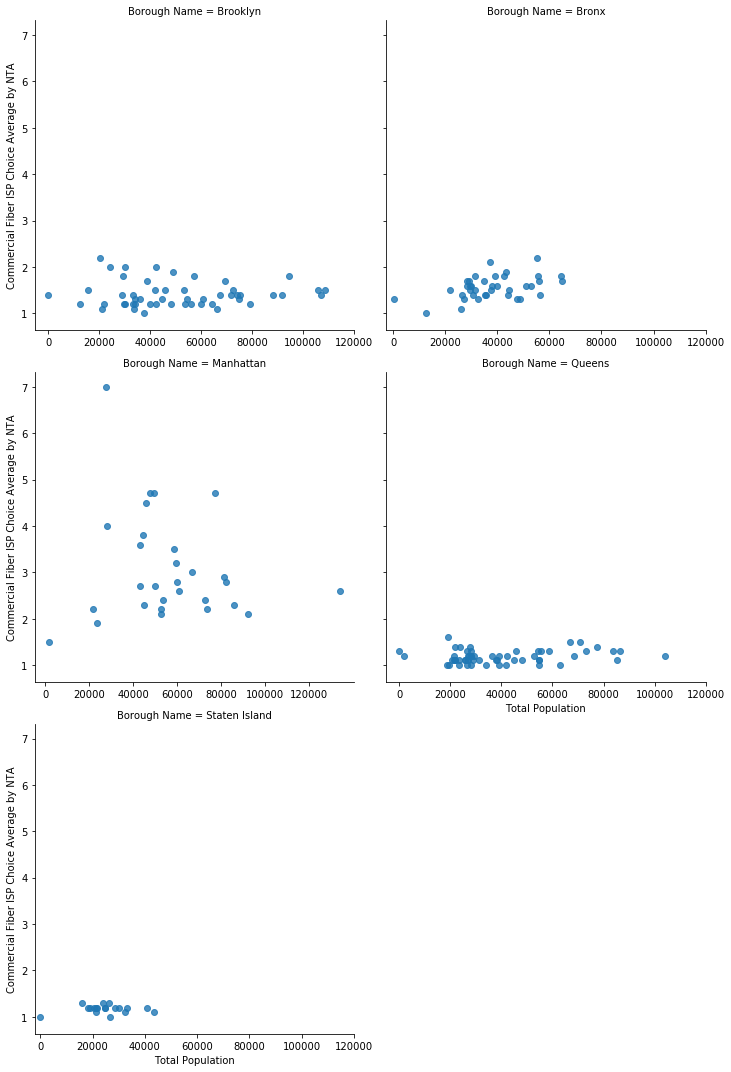

In [15]:
g = sns.lmplot("Total Population", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 140000, 20000))
plt.show(g)

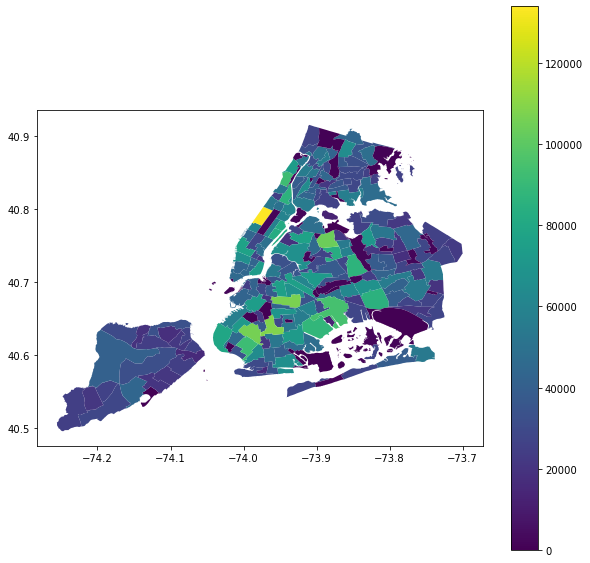

In [93]:
nyc_nta_internet.plot(figsize = (10,10), column = "Total Population", legend = True)